In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

import pickle
import os

In [2]:
pickle_in = open("MK2ECG_X_train.pickle","rb")
ECG_X_train = pickle.load(pickle_in)

pickle_in = open("MK2ECG_y_train.pickle","rb")
ECG_y_train = pickle.load(pickle_in)

ECG_X_train = ECG_X_train/255.0
print(ECG_X_train.shape)
print(ECG_y_train)

(115, 335, 192, 1)
[1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0
 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1
 1 1 1 1]


In [3]:
pickle_in = open("MK2ECG_X_test.pickle","rb")
ECG_X_test = pickle.load(pickle_in)

pickle_in = open("MK2ECG_y_test.pickle","rb")
ECG_y_test = pickle.load(pickle_in)

ECG_X_test = ECG_X_test/255.0
print(ECG_X_test.shape)
print(ECG_y_test)

(115, 335, 192, 1)
[1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0
 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0
 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1
 0 0 1 0]


In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=ECG_X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

hist = model.fit(ECG_X_train, ECG_y_train, batch_size=10, epochs=30, validation_split=0.3)
model.save('MK2ECG_Arrythmia&NSR.model')

Epoch 1/30
8/8 [==============================] - 0s 38ms/step - loss: 2.5089 - accuracy: 0.5250 - val_loss: 0.8216 - val_accuracy: 0.6571
Epoch 2/30
8/8 [==============================] - 0s 17ms/step - loss: 0.6076 - accuracy: 0.6625 - val_loss: 0.6583 - val_accuracy: 0.6571
Epoch 3/30
8/8 [==============================] - 0s 18ms/step - loss: 0.6349 - accuracy: 0.7125 - val_loss: 0.6020 - val_accuracy: 0.6571
Epoch 4/30
8/8 [==============================] - 0s 18ms/step - loss: 0.5271 - accuracy: 0.7375 - val_loss: 0.7592 - val_accuracy: 0.3429
Epoch 5/30
8/8 [==============================] - 0s 18ms/step - loss: 0.5170 - accuracy: 0.7250 - val_loss: 0.4965 - val_accuracy: 0.8000
Epoch 6/30
8/8 [==============================] - 0s 17ms/step - loss: 0.3573 - accuracy: 0.8625 - val_loss: 0.4693 - val_accuracy: 0.7429
Epoch 7/30
8/8 [==============================] - 0s 18ms/step - loss: 0.2671 - accuracy: 0.9125 - val_loss: 0.4292 - val_accuracy: 0.8000
Epoch 8/30
8/8 [===========

In [10]:
model.evaluate(ECG_X_test, ECG_y_test)[1]

4/4 [==============================] - 0s 10ms/step - loss: 0.1763 - accuracy: 0.9478


0.947826087474823

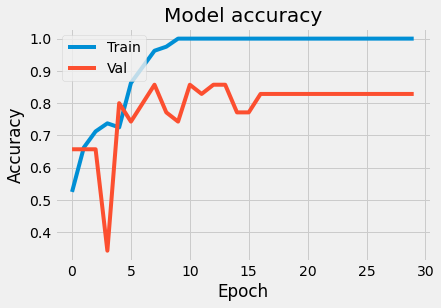

In [11]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Visualize the model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'upper left')
plt.show()

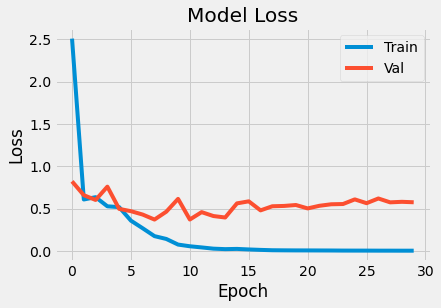

In [12]:
#Visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'upper right')
plt.show()